In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
resource = pd.read_csv('adc-word.csv')
sentences_train, sentences_test, y_train_data, y_test = train_test_split(resource['documents'], resource['category'], test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
vectorizer.fit(resource['documents'])
text_vector_train = vectorizer.fit_transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [4]:
text_vector_train.shape, X_test.shape

((54191, 765127), (13548, 765127))

In [5]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(text_vector_train, y_train_data.ravel())

In [6]:
classification = GradientBoostingClassifier()
classification.fit(X_train, y_train)
predicted = classification.predict(X_test)
print(metrics.classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted)

              precision    recall  f1-score   support

           0       0.78      0.63      0.70      4926
           1       0.76      0.81      0.78      3215
           2       0.78      0.78      0.78      3147
           3       0.87      0.97      0.92       766
           4       0.90      0.96      0.93       631
           5       0.33      0.62      0.43       435
           6       0.48      0.73      0.58       313
           7       0.72      0.97      0.83       115

    accuracy                           0.75     13548
   macro avg       0.70      0.81      0.74     13548
weighted avg       0.76      0.75      0.75     13548



In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, predicted))

Accuracy :  0.7477118393858873


In [8]:
print(cm)

[[3115  607  440  103   53  471  115   22]
 [ 318 2595  210    6    9   26   38   13]
 [ 349  207 2463    1    7   32   81    7]
 [  17    2    1  742    0    2    1    1]
 [   7    5    4    0  608    1    6    0]
 [ 140    5   12    1    1  268    7    1]
 [  30   10   37    0    0    9  227    0]
 [   1    1    1    0    0    0    0  112]]


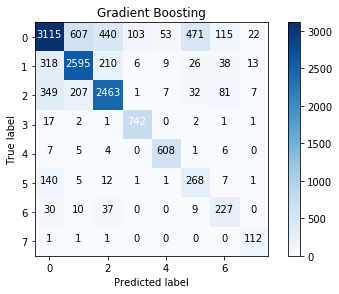

In [9]:
import matplotlib.pyplot as plt
import itertools
cmap = plt.cm.Blues
title = "Gradient Boosting"
classes = 8
normalize = False
tick_marks = np.arange(classes)
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(10)
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 5.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()